# Prediction Using Decision Tree Algorithm
### Data Science Intern
### LGMVIP - August 2022
### Task - 4 (Intermediate Level)

### Importing Libraries

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Reading and Exploring Data

In [32]:
iris_df = pd.read_csv("Iris.csv")
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
iris_df.shape

(150, 6)

In [34]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [35]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [36]:
iris_df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [37]:
iris_df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Pairplot

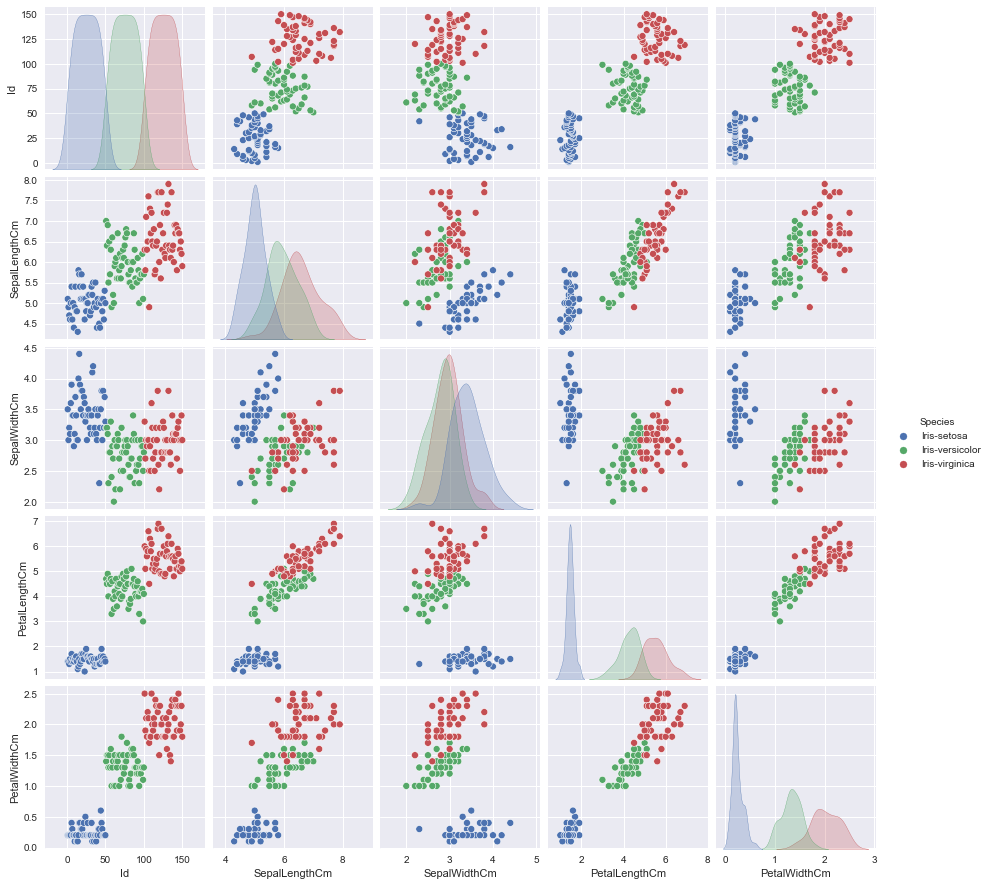

In [38]:
plt.style.use('seaborn')
sns.pairplot(iris_df, hue = "Species")

### Encoding and Train-Test Split

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris_df['Species'] = le.fit_transform(iris_df['Species'])
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [40]:
X = iris_df.drop("Species", axis=1)
y = iris_df.Species.values
X = preprocessing.scale(X)

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=8)

print("Number of training examples:", X_train.shape[0])
print("Number of validation examples:", X_val.shape[0])

Number of training examples: 120
Number of validation examples: 30


### Decision Tree Classifier

In [54]:
dt = DecisionTreeClassifier(criterion="entropy")

dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [55]:
train_preds = dt.predict(X_train)
val_preds = dt.predict(X_val)

train_score = accuracy_score(y_train, train_preds)
val_score = accuracy_score(y_val, val_preds)

print('Train score : {}'.format(train_score))
print('Validation score : {}'.format(val_score))

Train score : 1.0
Validation score : 1.0


#### Mind Blowing 100% accuracy :)

### Visualizing the Decision Tree

[Text(0.4, 0.8333333333333334, 'X[3] <= -0.744\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.6, 0.5, 'X[0] <= 0.577\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 41\nvalue = [0, 41, 0]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 39\nvalue = [0, 0, 39]')]

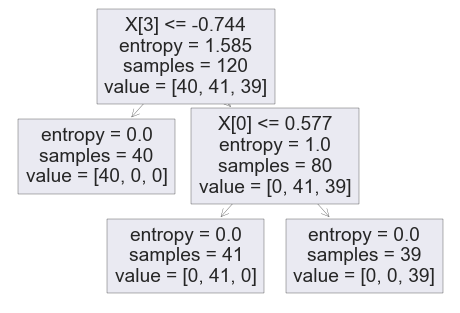

In [56]:
tree.plot_tree(dt)

[Text(0.4, 0.8333333333333334, 'PetalWidthCm <= -0.744\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]\nclass = Iris-versicolor'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = Iris-setosa'),
 Text(0.6, 0.5, 'SepalLengthCm <= 0.577\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]\nclass = Iris-versicolor'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 41\nvalue = [0, 41, 0]\nclass = Iris-versicolor'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 39\nvalue = [0, 0, 39]\nclass = Iris-virginica')]

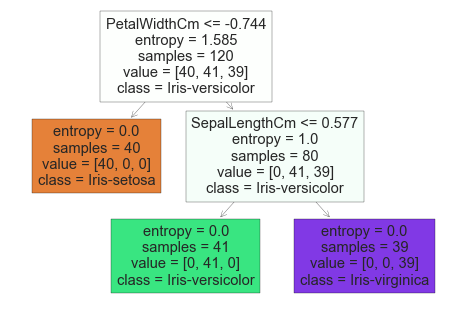

In [57]:
#plotting Tree
f_n = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
c_n = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
tree.plot_tree(dt, feature_names = f_n, class_names = c_n , filled = True)